In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
df = web.DataReader('IBM' , data_source='yahoo', start = '2013-01-01', end='2020-04-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,196.350006,193.800003,194.089996,196.350006,4234100.0,149.965622
2013-01-03,196.289993,194.440002,195.669998,195.270004,3644700.0,149.140732
2013-01-04,194.460007,192.779999,194.190002,193.990005,3380200.0,148.163147
2013-01-07,193.779999,192.339996,193.399994,193.139999,2862300.0,147.513916
2013-01-08,193.300003,191.600006,192.919998,192.869995,3026900.0,147.307709
...,...,...,...,...,...,...
2020-03-26,113.150002,105.570000,106.910004,112.889999,7153500.0,112.889999
2020-03-27,111.500000,107.650002,108.580002,108.029999,6423000.0,108.029999
2020-03-30,113.459999,107.809998,108.089996,112.930000,5564500.0,112.930000


In [6]:
df.shape

(1825, 6)

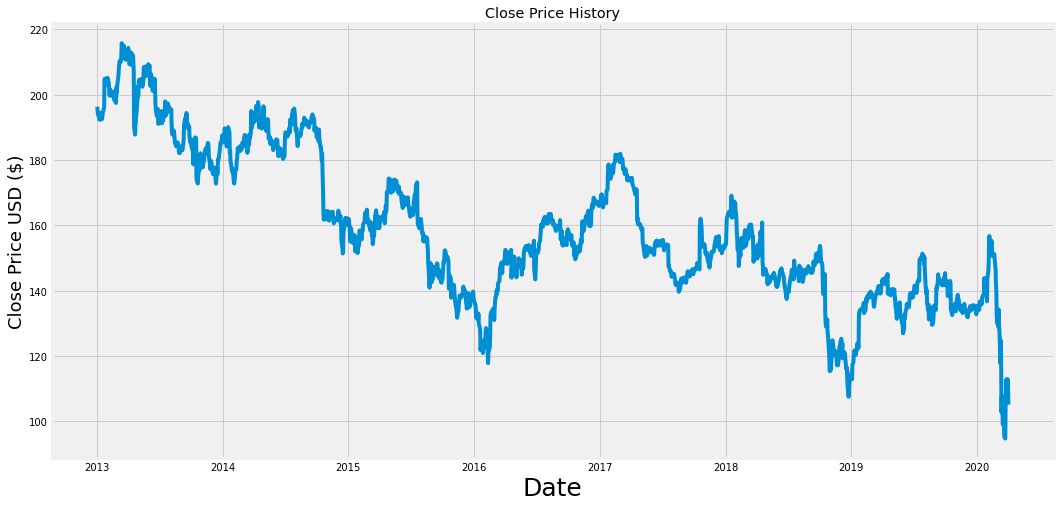

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=25)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.show()


In [9]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

1460

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.83929608],
       [0.83037265],
       [0.81979677],
       ...,
       [0.15004547],
       [0.13352064],
       [0.08568125]])

In [12]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i , 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.83929608, 0.83037265, 0.81979677, 0.81277367, 0.81054279,
       0.80599856, 0.81062549, 0.82359741, 0.80847718, 0.80748573,
       0.80822932, 0.81698746, 0.8237627 , 0.83706519, 0.90845244,
       0.90597369, 0.91051804, 0.91018748, 0.9016772 , 0.89853757,
       0.89481951, 0.91225308, 0.90076833, 0.89250592, 0.87788153,
       0.86730565, 0.88333463, 0.87077585, 0.86978428, 0.87019742,
       0.86656194, 0.87755097, 0.87209787, 0.86375275, 0.85565562,
       0.87845984, 0.84888038, 0.86234816, 0.88870528, 0.87631165,
       0.89349749, 0.91233578, 0.92340739, 0.9386929 , 0.94728576,
       0.95521773, 0.95273898, 0.95662233, 0.96909853, 1.        ,
       0.99272904, 0.97860038, 0.9805007 , 0.99388577, 0.97075098,
       0.96926381, 0.95819221, 0.97157728, 0.95943152, 0.97934397])]
[0.9717425597963141]

[array([0.83929608, 0.83037265, 0.81979677, 0.81277367, 0.81054279,
       0.80599856, 0.81062549, 0.82359741, 0.80847718, 0.80748573,
       0.80822932, 0.81698746, 0.823

In [0]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [17]:
x_train = np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1400, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [21]:
model.fit(x_train , y_train , batch_size=1 , epochs=1)

Epoch 1/1
1400/1400 [==============================] - 56s 40ms/step - loss: 0.0013


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
 x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions  = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03013997535183005

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


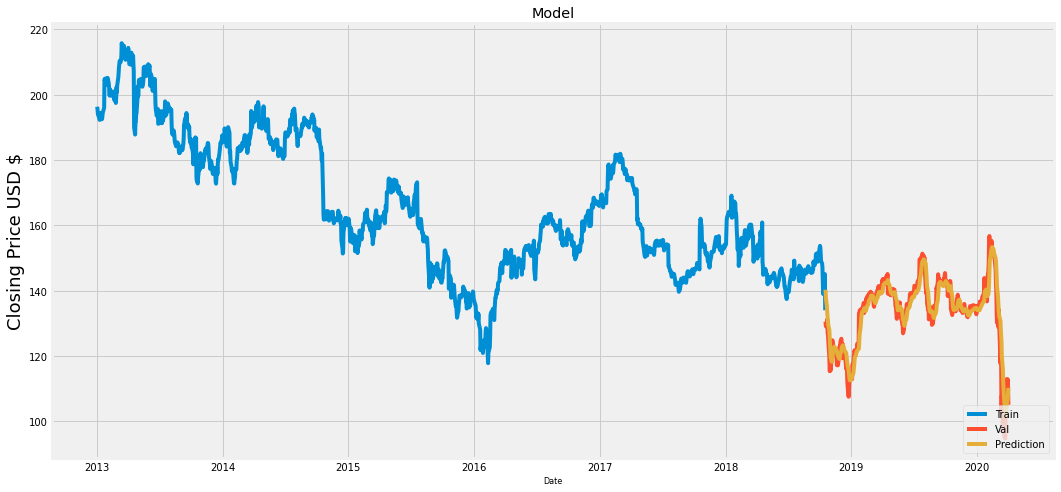

In [37]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Closing Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2018-10-18,130.550003,140.302399
2018-10-19,129.100006,137.835358
2018-10-22,130.020004,135.221817
2018-10-23,131.210007,133.213074
2018-10-24,127.209999,132.036346
...,...,...
2020-03-26,112.889999,102.682533
2020-03-27,108.029999,105.097450
2020-03-30,112.930000,106.873222


In [49]:
ibm_quote = web.DataReader('IBM',data_source='yahoo',start = '2013-01-01' , end='2020-04-28')
new_df = ibm_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[120.50468]]


In [48]:
ibm_quote2 = web.DataReader('IBM',data_source='yahoo',start = '2013-01-01' , end='2020-04-28')
print(ibm_quote2['Close'])


Date
2013-01-02    196.350006
2013-01-03    195.270004
2013-01-04    193.990005
2013-01-07    193.139999
2013-01-08    192.869995
                 ...    
2020-04-20    120.410004
2020-04-21    116.760002
2020-04-22    119.309998
2020-04-23    121.349998
2020-04-24    124.720001
Name: Close, Length: 1841, dtype: float64
